In [298]:
#import libraries 
import pandas as pd
import pyreadstat
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import html
import plotly as px
import plotly.express as px

In [299]:
#open file 
file = '/Users/utente/Library/CloudStorage/OneDrive-Raccoltecondivise-INTWIGsrl/Archivio - Documenti/Lavori/OMNIBUS/2023/Wave 01/05. Analisi/Profilazione/omnibus_finalefonte_peso con R.sav'
df = pd.read_spss(file)

In [300]:
#select the columns of your interest 
columns_of_interest = df.iloc[:, 14:115]
ids = df.iloc[:, 0]
result = pd.concat([ids, columns_of_interest], axis=1)


In [301]:
#refactor the aut value
result['aut'] = result['aut'].replace(["Estrema sinistra", "Sinistra", "Centro sinistra", "Centro", "Centro destra", "Destra", "Estrema destra", "Non so"], [1, 2, 3,4, 5,6,7,8])

In [302]:
#refactor other variable
for col in result.columns:
    
    if 'INDCOL' in col:
        variable = 'INDCOL'
        result[col] = result[col].replace(['Molto', 'Abbastanza', 'Poco', 'Per niente'], [4, 3, 2,1])
        
    elif 'CONS' in col:
        variable = 'CONS'
        result[col] = result[col].replace(["Molto d'accordo", "Abbastanza d'accordo", "Non molto d'accordo", "Per niente d'accordo"], [4, 3, 2,1])
        
    elif 'PERS' in col:
        variable = 'PERS'
        result[col] = result[col].replace(["Molto d'accordo", "Abbastanza d'accordo", "Non molto d'accordo", "Per niente d'accordo"], [4, 3, 2,1])
        
    elif 'SOC' in col:
        variable = 'SOC'
        result[col] = result[col].replace(["Andare a divertirmi nei locali più frequentati.", "Uscire con gli amici per bere e mangiare qualcosa insieme.", "Rimanere a casa la sera a guardare un film con la mia famiglia, il mio partner o i miei amici.", "Andare in posti poco frequentati per godermi di più le persone a cui voglio bene.", "Non fare tardi la sera per essere più riposati al mattino."], [1, 2, 3,4, 5])
        
    elif 'spesa1_1' in col or 'spesa1_2'in col:
        if col == 'spesa1_1':
            variable = 'spesa1_1'
            result[variable] = result[variable].replace(["Supermercato", 'Negozio di quartiere (es. macellaio, fruttivendolo, ecc.)', 'Online', 'Online con servizio a domicilio', 'Online con opzione di ritiro in loco', 'Online con opzione di ritiro al supermercato', 'Mercato'], [1, 2, 3,3, 4, 4, 5])
            result[variable] = result[variable].cat.add_categories([0])
            result[variable] = result[variable].fillna(0)
            
        elif col == 'spesa1_2':
            variable = 'spesa1_2'
    
            result[variable] = result[variable].replace(["Supermercato", 'Negozio di quartiere (es. macellaio, fruttivendolo, ecc.)', 'Online', 'Online con servizio a domicilio', 'Online con opzione di ritiro in loco', 'Online con opzione di ritiro al supermercato', 'Mercato'], [1, 2, 3,3, 4, 4, 5])
            result[variable] = result[variable].cat.add_categories([0])
            result[variable] = result[variable].fillna(0)
    
    
    elif 'T1' in col:
        result[col] = result[col].replace(["Molto d'accordo", "Abbastanza d'accordo", "Non molto d'accordo", "Per niente d'accordo"], [4, 3, 2,1])
        
        
    elif 'T2' in col:
        result[col] = result[col].replace(["Sì, e l’ho utilizzata", "Sì, so cosa è", "Ne ho sentito parlare ma non so cosa è", "Mai sentito parlare"], [1,2,3,4])
        
        
        

In [365]:
#select the final version of the dataset 
prima = result.iloc[:, :31]
rest = pd.concat([result.iloc[:, 49:56], result.iloc[:, 101]], axis = 1)
finale = pd.concat([prima, rest], axis=1)
finale = finale[finale['aut'] != 8]


In [304]:
#mantengo solo le colonne relative alle variabili PERS - INDCOL - SOC - CONS - spesa12 - tecnologia e appartenenza politica
finale

,id,PERS_1,PERS_2,PERS_3,PERS_4,PERS_5,PERS_6,PERS_7,PERS_8,PERS_9,...,spesa1_1,spesa1_2,T1_1,T1_2,T1_3,T1_4,T1_5,T1_6,T1_7,aut
0,119.0,4,3,3,1,4,2,3,3,3,...,4,1,3,3,2,3,3,2,3,4
1,58.0,4,1,4,1,4,4,3,3,1,...,1,5,4,4,3,4,3,3,4,4
2,64.0,4,3,4,2,3,3,2,3,4,...,1,5,3,3,2,3,1,1,4,3
7,176.0,3,2,3,2,3,2,3,2,3,...,2,5,3,3,2,3,2,1,3,5
10,248.0,3,2,3,2,4,3,2,3,2,...,1,2,3,3,3,3,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,147.0,3,3,4,1,3,1,1,3,3,...,2,5,2,2,3,4,1,1,3,6
583,179.0,3,3,1,4,4,3,2,2,4,...,1,5,3,3,3,3,2,3,4,7
584,188.0,2,3,2,3,4,1,3,2,3,...,1,4,4,2,4,4,3,3,2,4
585,214.0,3,2,3,1,3,2,1,3,3,...,1,2,4,3,3,3,2,2,3,5


# CLUSTER ANALYSIS - Variables not aggregated

In [366]:
# Transform data in array numpy
scaled_features = StandardScaler().fit_transform(finale)

In [367]:
#perform k-means cluster analysis, force 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_features)
labels = kmeans.labels_

# Aggiungere la colonna con l'etichetta di appartenenza al cluster di ogni utente
finale['cluster_not_ag'] = labels


/Users/utente/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



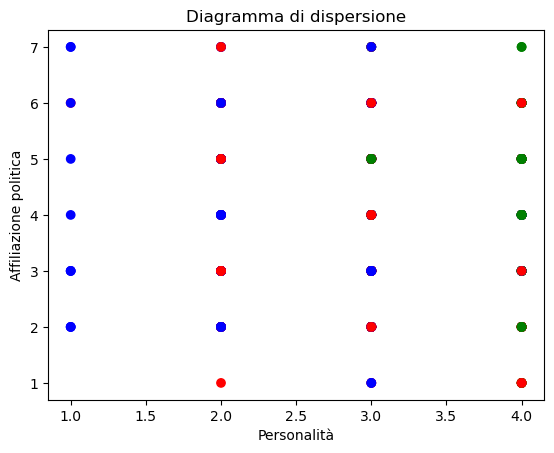

In [368]:
# define colors for each cluster
colors = ['red', 'green', 'blue']

# Dispersion Graph
plt.scatter(finale['PERS_1'], finale['aut'], c=finale['cluster_not_ag'].map(lambda x: colors[x]))

# Configuration
plt.title('Diagramma di dispersione')
plt.xlabel('Personalità')
plt.ylabel('Affiliazione politica')

# Visualization
plt.show()


# CLUSTER ANALYSIS - Variables Aggregated

Ho deciso di aggregare alcune variabili per evitare troppa dispersione. 
Ho unito le variabili del sottogruppo PERS in due gruppi: quelle che identificiano tratti positivi della personalità e quelle che invece sottolineano tratti negativi. 

**pers_positiva** = PERS1, PERS3, PERS5, PERS6, PERS8, PERS9 

**pers_negativa** = PERS2, PERS4, PERS7, PERS10

**individualismo - collettivismo** = INDCOL1, INDCOL2, INDCOL3, INDCOL4, INDCOL5, INDCOL6, INDCOL7
*(valori medi alti di questa variabile identificano maggiore individualismo, valori bassi invece maggiore solidarietà)* 

NB: ho dovuto però "girare" le variabili 1,3 di questa categoria per far quadrare quanto sopra riportato.

**consumo** = CONS1, CONS2, CONS3, CONS5, CONS4 (girata), CONS6 (girata)

*(valori medi alti di questa variabile identificano le persone che amano omologarsi alle mode del momento e fanno cose "pop", mentre valori bassi identificano gruppi che fanno cose di nicchia e fruiscono di cultura indie)*

**tipo di consumo** = Spesa1_1, Spesa1_2

*(Primi due metodi di acquisto preferiti, valori bassi della variabile significano una predilezione per l'acquisto in loco fisico, valori alti invece una predilezione per lo shopping online)*

**tecnologia** = T1_1, T1_2, T1_3, T1_4, T1_5, T1_6, T1_7

*(valori alti di questa vvariabile = grande fiducia, mentre valori bassi = scetticismo)*

In [369]:
#We invert some variables in order to have a correct scale
inversioni = []
first_var = finale['INDCOL_1']
second_var = finale['INDCOL_3']
third_var = finale['CONS_4']
fourth_var = finale['CONS_6']
fifth_var = finale['T1_2']
sixth_var = finale['T1_3']
seventh_var = finale['T1_7']

ensemble = [first_var, second_var, third_var, fourth_var, fifth_var, sixth_var, seventh_var]

for var in ensemble:
    inversion = []
    
    for line in var:
        if line == 4:
            inversion.append(1)

        elif line == 3:
            inversion.append(2)

        elif line == 2:
            inversion.append(3)

        elif line == 1:
            inversion.append(4)
        
    inversioni.append(inversion)
    

In [370]:
#we reassign the new values to the correct column
finale['INDCOL_1'] = inversioni[0]
finale['INDCOL_3'] = inversioni[1]
finale['CONS_4'] = inversioni[2]
finale['CONS_6'] = inversioni[3]
finale['T1_2'] = inversioni[4]
finale['T1_3'] = inversioni[5]
finale['T1_7'] = inversioni[6]

In [324]:
#Aggregate the grouped variables 
pers_positiva = pd.concat([finale['PERS_1'], finale['PERS_3'], finale['PERS_5'], finale['PERS_6'], finale['PERS_8'], finale['PERS_9']], axis = 1)
pers_negativa = pd.concat([finale['PERS_2'], finale['PERS_4'], finale['PERS_7'], finale['PERS_10']], axis = 1)
ind_cols = finale.filter(regex='^INDCOL', axis=1)
consumo = finale.filter(regex = '^CONS', axis = 1)
spesa_col = finale.filter(regex='^spesa', axis=1)
tecnologia = finale.filter(regex='^T1', axis=1)

# Calculate the mean for each row in the selected columns
finale['PERS_pos'] = [round(ele,2) for ele in pers_positiva.mean(axis=1)]
finale['PERS_neg'] = [round(ele,2) for ele in pers_negativa.mean(axis=1)]
finale['INDCOL_mean'] = [round(ele,2) for ele in ind_cols.mean(axis=1)]
finale['consumo'] = [round(ele,2) for ele in consumo.mean(axis=1)]
finale['spesa_mean'] = [round(ele,2) for ele in spesa_col.mean(axis=1)]
finale['tecnologia'] = [round(ele,2) for ele in tecnologia.mean(axis=1)]

In [354]:
#we have a dataset where the political affiliation variable is included and another where is not included
political = pd.concat([finale.iloc[:,24:29], finale.iloc[:,38:]], axis = 1)
not_political = pd.concat([finale.iloc[:,24:29], finale.iloc[:,39:]], axis = 1)

#scaled_features1 = StandardScaler().fit_transform(selected_columns)
kmeans_political = KMeans(n_clusters=4)
kmeans_political.fit(political)

kmeans_not_political = KMeans(n_clusters=3)
kmeans_not_political.fit(not_political)


# Add a column to your original dataframe with the cluster assignments
political['cluster_agg'] = kmeans_political.labels_
not_political['cluster_agg'] = kmeans_not_political.labels_

/Users/utente/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/utente/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# ANALISI senza considerare il credo politico

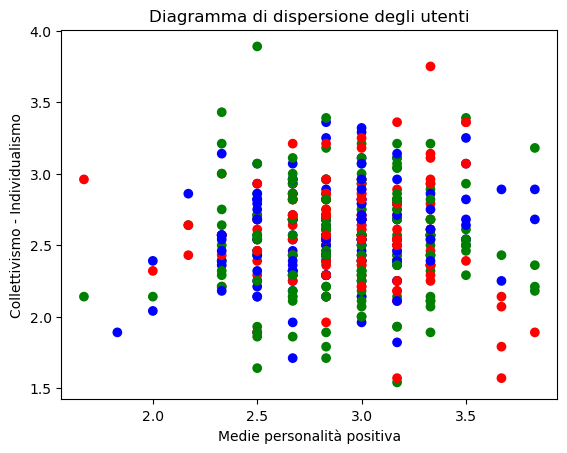

In [371]:
#define colors
colors = ['red', 'green', 'blue']

# Dispersion Graph
plt.scatter(not_political['PERS_pos'], not_political['INDCOL_mean'], c=not_political['cluster_agg'].map(lambda x: colors[x]))

# Configuration
plt.title('Diagramma di dispersione degli utenti')
plt.xlabel('Medie personalità positiva')
plt.ylabel('Collettivismo - Individualismo')

# Visualization
plt.show()

## PERSONALITÀ (POS o NEG) VS CREDO POLITICO

In [356]:
#color pattern
px.defaults.color_continuous_scale =px.colors.qualitative.Set1

#set up the figure details
fig = px.scatter(not_political, x='PERS_neg', y='consumo', color='cluster_agg',  labels={'PERS_mean': 'Tratti', 'consumo': 'Stile di Consumo',
                         'cluster_agg': 'Cluster'})



#provide the layout
fig.update_layout(
    title='Personalità VS Stile di Consumo',
    xaxis_title='Variabili personali positive',
    yaxis_title='Stile di consumo'
)



# Show the plot
fig.show()

## Stile di consumo (Omologato o Alternativo) VS INDCOL (individualismo - collettivismo)

In [357]:
#set up figure
fig = px.scatter(not_political, x='consumo', y='INDCOL_mean', color='cluster_agg',  labels={'consumo': 'Stile di Consumo', 'INDCOL_mean': 'Individualismo',
                         'cluster_agg': 'Cluster'})



#provide layout
fig.update_layout(
    title='Personalità VS Individualismo-Collettivismo',
    xaxis_title='Stile di Consumo',
    yaxis_title='Individualismo'
)



# Show the plot
fig.show()

## ABITUDINI DI CONSUMO vs AFFILIAZIONE POLITICA

In [358]:
fig = px.scatter(political, x='spesa_mean', y='aut', color='cluster_agg',  labels={'spesa_mean': 'Tipo di acquisti', 'aut': 'Credo politico',
                         'cluster': 'Cluster'})



fig.update_layout(
    title='Abitudini di consumo vs affiliazione politica',
    xaxis_title='Spesa Media',
    yaxis_title='Credo politico'
)




# Show the plot
fig.show()

## Genero delle contingency table per avere una visione più specifica dei risultati dei CLUSTERS


#### Calcolo la media della colonna del credo politico per ogni cluster

In [372]:
political['aut'] = political['aut'].astype(float)

means = political.groupby('cluster_agg')['aut'].mean()

contingency_table = pd.DataFrame({'mean_political': means})
contingency_table

,mean_political
cluster_agg,
0,3.865772
1,3.897196
2,4.059259
3,4.097561


In [373]:
means = political.groupby('cluster_agg').mean()

contingency_table = means.reset_index().rename(columns={0: 'mean_value'})

table = pd.DataFrame(contingency_table)
table

/var/folders/xb/vvc68n450fbddr8m1x399n3h0000gn/T/ipykernel_5133/784963618.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,cluster_agg,aut,cluster_not_ag,PERS_pos,PERS_neg,INDCOL_mean,consumo,spesa_mean,tecnologia
0,0,3.865772,0.637584,2.904698,2.030201,2.499933,2.235503,1.939597,2.463221
1,1,3.897196,1.336449,2.949813,2.084112,2.592056,2.527850,1.976636,2.639907
2,2,4.059259,0.962963,2.854519,2.200000,2.586444,2.320815,1.988889,2.586074
3,3,4.097561,1.329268,2.991585,2.167683,2.653293,2.635854,2.347561,2.735122


**CLUSTER ANALYSIS WITH 2 GROUPS:** 

*COSE INTERESSANTI DA SEGNALARE*: 

- pare che non ci sia una differenziazione netta tra destra e sinistra

- non ci sono variazioni significative nei tratti positivi e negativi della personalità, forse le persone del primo cluster hanno una media delle caratteristiche positive maggiore di quelli del secondo cluster

- Quelli del primo cluster sono più individualisti e opportunisti, mentre quelli del secondi sono più solidali

- interessante notare che chi fa più spese online è anche chi ha maggiore fiducia nella tecnologia

**CLUSTER ANALYSIS WITH 4 GROUPS:** 

*COSE INTERESSANTI DA SEGNALARE*: 

- *cluster 4* = persone di destra, con tratti la media dei tratti personalità positivi più alta di tutti e una media di caratteristiche negative della personalità più alta rispetto ai due cluster più a sinistra. Sono i più opportunisti e i meno solidali, hanno delle abitudini di consumo piuttosto omologate alla massa, grande fiducia nella tecnologia e amano acquistare online. 

- *cluster 1* = persone leggermente meno di destra, la media dei tratti di personalità POSITIVI è la più bassa, mentre quelli negativi sono i più alti tra i gruppi. Sono i secondi, dopo il cluster 4 per opportunismo e individualismo. Si omologano meno alle mode e ai trend culturali e sono più scettici nei riguardi della tecnologia; acquistano più in negozi fisici.

- *cluster 2* = persone ancor leggermente meno di destra (più verso il centro), la media dei tratti di personalità posivi è medio-bassa, mentre quelli negativi sono i più bassi tra i gruppi. Sono i più solidali e quelli meno omologati alla cultura di massa. Sono coloro che favoriscono l'acquisto in loco e più scettici verso tecnologia. (CONSAPEVOLI E PONDERATI, INDIPENDENTI E SOLIDATI)

- *cluster 3* = persone più a sinistra delle altre, buoni aspetti della personalità. Sono abbastanza solidali, ma seguono abbastanza le mode e i trend culturali. Più entusiasti per la tecnologia e gli acquisti online rispetto al cluster 1 e 2, ma meno del cluster 4.

In [362]:
not_political

,SOC_1,SOC_2,SOC_3,SOC_4,SOC_5,cluster_not_ag,PERS_pos,PERS_neg,INDCOL_mean,consumo,spesa_mean,tecnologia,cluster_agg
0,2,4,5,1,3,1,3.17,2.25,2.79,3.17,2.5,2.71,2
1,2,3,4,5,1,1,3.33,2.00,2.93,3.33,3.0,3.57,1
2,4,3,5,2,1,0,3.50,2.50,2.50,1.50,3.0,2.43,2
7,3,4,5,2,1,0,2.67,2.25,2.57,1.50,3.5,2.43,2
10,3,2,4,5,1,0,3.00,2.00,2.39,2.00,1.5,2.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2,4,3,5,1,0,2.83,1.75,2.64,1.67,3.5,2.29,1
583,3,2,4,1,5,2,2.83,2.75,2.57,1.83,3.0,3.00,0
584,2,4,5,3,1,2,2.33,2.75,3.14,3.00,2.5,3.14,2
585,4,2,1,3,5,1,2.83,1.25,2.71,3.00,1.5,2.86,0


In [363]:
means_2 = not_political.groupby('cluster_agg').mean()
# create a contingency table with the results
contingency_table_2 = means_2.reset_index().rename(columns={0: 'mean_value'})

table_2 = pd.DataFrame(contingency_table_2)

/var/folders/xb/vvc68n450fbddr8m1x399n3h0000gn/T/ipykernel_5133/1180877746.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [364]:
table_2

,cluster_agg,cluster_not_ag,PERS_pos,PERS_neg,INDCOL_mean,consumo,spesa_mean,tecnologia
0,0,1.319728,2.957755,2.095238,2.587483,2.566599,2.068027,2.662245
1,1,0.807487,2.925775,2.064171,2.549893,2.322193,2.056150,2.530909
2,2,0.949640,2.857482,2.203237,2.585540,2.312806,1.964029,2.577410
